In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Load the files to create the training data

df1 = pd.read_csv('data\Q&A dataset with label - 05 04.csv')
df2 = pd.read_csv('data\Q&A dataset with label - 1502-subtopics with comments (2).csv', header=1)
df1.shape, df2.shape

((2359, 4), (1178, 9))

### Cleaning df1

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Label       1371 non-null   object 
 2   Question    2358 non-null   object 
 3   Answer      2352 non-null   object 
dtypes: float64(1), object(3)
memory usage: 73.8+ KB


In [88]:
df1['Label'].unique()

array(['taxonomy', 'factual', 'ethics and regulation', 'analysis',
       'strategy', 'analysis, strategy',
       'strategy, ethics and regulation',
       'ethics and regulation, strategy',
       'ethics and regulation, factual',
       'ethics and regulation, analysis',
       'ethics and regulation, taxonomy', 'management', 'Strategy', nan,
       'factual, ethics and regulation', 'science and tech',
       'strategy,analysis', 'anlysis', 'strrategy', 'taxonomy, strategy'],
      dtype=object)

In [89]:
# Drop the unnamed column
df1 = df1.drop(columns='Unnamed: 0', axis=1)
df1 = df1[['Question', 'Answer', 'Label']]
df1.sample(5)

,Question,Answer,Label
1879,What is the bigger challenge facing not just s...,The bigger challenge facing not just shipping ...,NaN
1233,What is Precision Agriculture?,"Precision Agriculture, also known as satellite...",taxonomy
2186,What negative impacts can brownification have ...,Brownification can have a negative impact on t...,NaN
675,How have European studies investigated the eff...,European studies have generally used national ...,analysis
1209,What does sustainable intensification of agric...,Sustainable intensification of agriculture ref...,taxonomy


In [90]:
# The code below will change the labels to one specific label. eg different spelling of same label
df1 = df1.replace(['Strategy','strategies', 'strrategy', ''],'strategy')
df1 = df1.replace(['Analysis', 'anlysis'],'analysis')

In [91]:
df1 = df1[df1['Label'].isin(['ethics and regulation', 'analysis', 'strategy', 'science and tech', 'factual', 'taxonomy', 'management'])]
df1['Label'].unique()

array(['taxonomy', 'factual', 'ethics and regulation', 'analysis',
       'strategy', 'management', 'science and tech'], dtype=object)

In [92]:
df1['Label'].value_counts()

ethics and regulation    344
analysis                 301
science and tech         299
strategy                 227
factual                   84
taxonomy                  48
management                40
Name: Label, dtype: int64

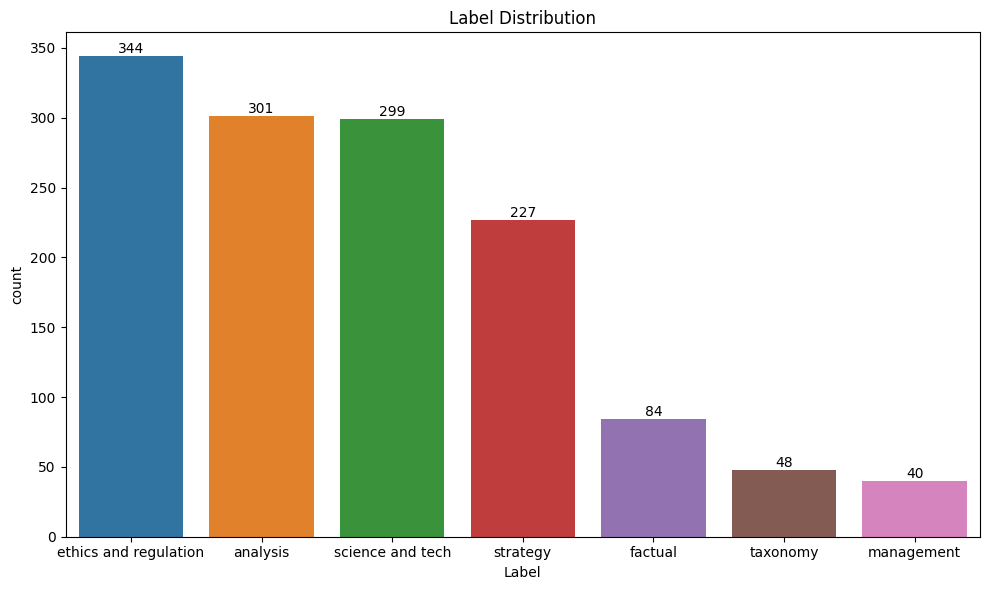

In [93]:
plt.figure(figsize=(10, 6))
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
ax = sns.countplot(data=df1, x='Label', order=df1['Label'].value_counts().index)
# Add count labels on top of each bar
for i, count in enumerate(df1['Label'].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [94]:
df1.isna().sum()

Question    0
Answer      4
Label       0
dtype: int64

In [95]:
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1395
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1339 non-null   object
 1   Answer    1339 non-null   object
 2   Label     1339 non-null   object
dtypes: object(3)
memory usage: 41.8+ KB


### Cleaning df2

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   keywords    578 non-null    object
 1   label       1155 non-null   object
 2   Question    1178 non-null   object
 3   Answer      1178 non-null   object
 4   topic       1178 non-null   object
 5   subtopic    958 non-null    object
 6   topic.1     1178 non-null   object
 7   subtopic.1  957 non-null    object
 8   URL source  1 non-null      object
dtypes: object(9)
memory usage: 83.0+ KB


In [97]:
df2['topic'].value_counts()

green finance      375
decarbonization    294
pollution          280
biodiversity       229
Name: topic, dtype: int64

In [98]:
df2 = df2[['Question', 'Answer', 'label']]
df2 = df2[pd.notnull(df2['label'])]
df2.sample(2)

,Question,Answer,label
140,What is subjective well-being?,Subjective well-being SWB is a broad category ...,taxonomies
738,How much time needs normally need to develop a...,It normally takes 2550 years needed develope a...,analysis


In [99]:
df2.rename(columns={'label': 'Label'}, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1177
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1155 non-null   object
 1   Answer    1155 non-null   object
 2   Label     1155 non-null   object
dtypes: object(3)
memory usage: 36.1+ KB


In [100]:
df2['Label'].value_counts()

strategy                     272
science&tech                 268
analysis                     161
factual                      145
ethic and reg                 88
ethics & reg                  69
taxonomies                    55
management                    49
Strategy                      12
taxonomy                       9
Ethics & reg                   4
strategic analysis             3
factual, analysis              3
analysis | science & tech      2
strategy / ethics and reg      2
ethics & reg, analysis         2
taxonomy, strategy             1
strategy, factual              1
strategy/management            1
strategies                     1
factual,                       1
factual/science & tech         1
analysis, strategy             1
factual / analysis             1
Analysis                       1
str                            1
Factual                        1
Name: Label, dtype: int64

In [101]:
# The code below will change the labels to one specific label. eg different spelling of same label
df2 = df2.replace(['Strategy','strategies', 'strrategy', 'str'],'strategy')
df2 = df2.replace(['Ethics and regulation', 'Ethics & reg', 'ethic and reg'],'ethics and regulation')
df2 = df2.replace(['science&tech'],'science and tech')
df2 = df2.replace(['taxonomies'],'taxonomy')
df2 = df2.replace(['factual ', 'factual,', 'Factual'],'factual')

df2 = df2[df2['Label'].isin(['ethics and regulation', 'analysis', 'strategy', 'science and tech', 'factual', 'taxonomy', 'management'])]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 1177
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1066 non-null   object
 1   Answer    1066 non-null   object
 2   Label     1066 non-null   object
dtypes: object(3)
memory usage: 33.3+ KB


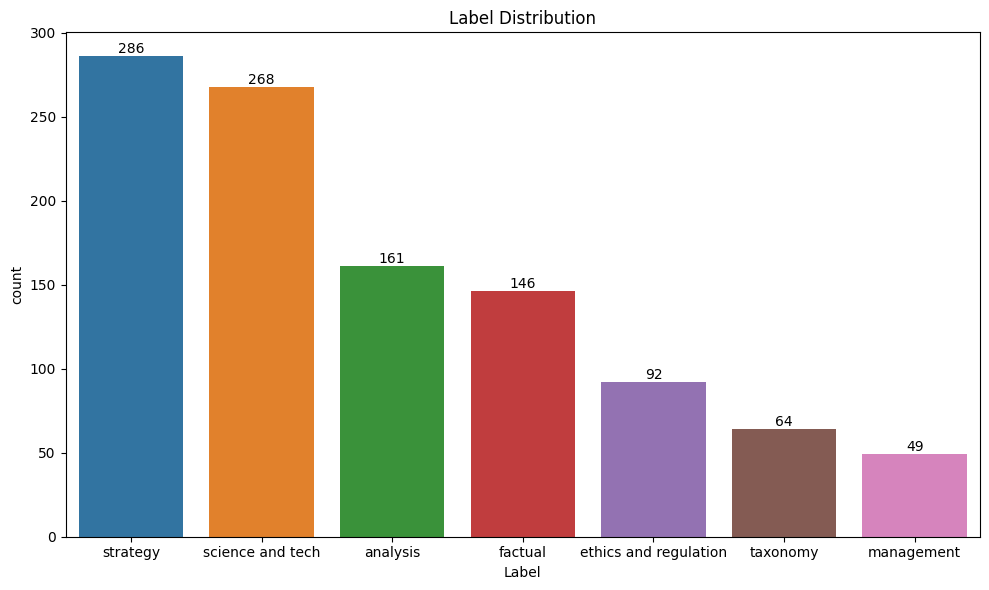

In [102]:
plt.figure(figsize=(10, 6))
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
ax = sns.countplot(data=df2, x='Label', order=df2['Label'].value_counts().index)
# Add count labels on top of each bar
for i, count in enumerate(df2['Label'].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Merging df1 and df2

In [103]:
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  2405 non-null   object
 1   Answer    2405 non-null   object
 2   Label     2405 non-null   object
dtypes: object(3)
memory usage: 56.5+ KB


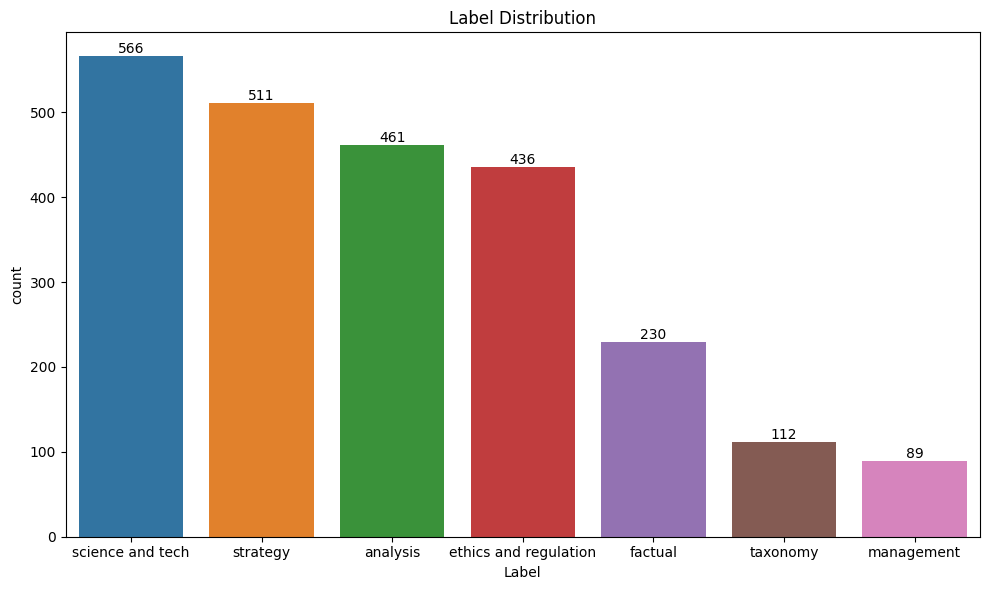

In [104]:
plt.figure(figsize=(10, 6))
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
ax = sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index)
# Add count labels on top of each bar
for i, count in enumerate(df['Label'].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [105]:
# Save the file 
df.to_csv('data/train_combined_imbalanced_7_labels.csv', index=False)

### New pre-labelled data

In [106]:
# Read in the data
df_new = pd.read_excel('data\8606 db for prelabelling .xlsx', sheet_name='db', header=11)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8479 entries, 0 to 8478
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8479 non-null   int64  
 1   Question     8479 non-null   object 
 2   Answer       8477 non-null   object 
 3   topic_name   8479 non-null   object 
 4   topic_words  8479 non-null   object 
 5   Riya         3188 non-null   object 
 6   Daniel
      1 non-null      object 
 7   Lola         510 non-null    object 
 8   Suman        38 non-null     object 
 9   Raph         0 non-null      float64
 10  Simon        0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Final        3082 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 861.3+ KB


In [107]:
df_new = df_new[['Question', 'Answer', 'Final']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8479 entries, 0 to 8478
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  8479 non-null   object
 1   Answer    8477 non-null   object
 2   Final     3082 non-null   object
dtypes: object(3)
memory usage: 198.9+ KB


In [108]:
df_new.rename(columns={'Final': 'Label'}, inplace=True)
df_new.head(5)

,Question,Answer,Label
0,What were the sources of atmospheric nutrients...,The primary sources of atmospheric nutrients t...,analysis
1,How was the fertilization effect on phytoplank...,The fertilization effect on phytoplankton was ...,analysis
2,How do rising temperatures affect Alpine lakes?,Rising temperatures increase mineral weatherin...,analysis
3,How has an increase in phytoplankton biomass b...,Significant increase in phytoplankton biomass ...,Tie
4,How do higher metabolic rates of organisms and...,Higher metabolic rates of organisms and longer...,analysis


In [109]:
# Drop nan values for now
df_new = df_new.dropna()

In [110]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3080 entries, 0 to 3187
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  3080 non-null   object
 1   Answer    3080 non-null   object
 2   Label     3080 non-null   object
dtypes: object(3)
memory usage: 96.2+ KB


In [111]:
# Check unique label values
df_new['Label'].value_counts()

analysis                 1007
science and tech          975
factual                   502
strategy                  310
Tie                       149
science and tech           63
management                 36
ethics and regulation      18
taxonomy                   17
strategy                    3
Name: Label, dtype: int64

In [112]:
df_new['Label'].unique()

array(['analysis', 'Tie', 'science and tech', 'factual', 'taxonomy',
       'ethics and regulation', 'strategy', 'management', 'strategy ',
       'science and tech '], dtype=object)

In [113]:
# Correcting labels
df_new = df_new.replace(['science and tech ', 'strategy '], ['science and tech', 'strategy'])
df_new['Label'].value_counts()

science and tech         1038
analysis                 1007
factual                   502
strategy                  313
Tie                       149
management                 36
ethics and regulation      18
taxonomy                   17
Name: Label, dtype: int64

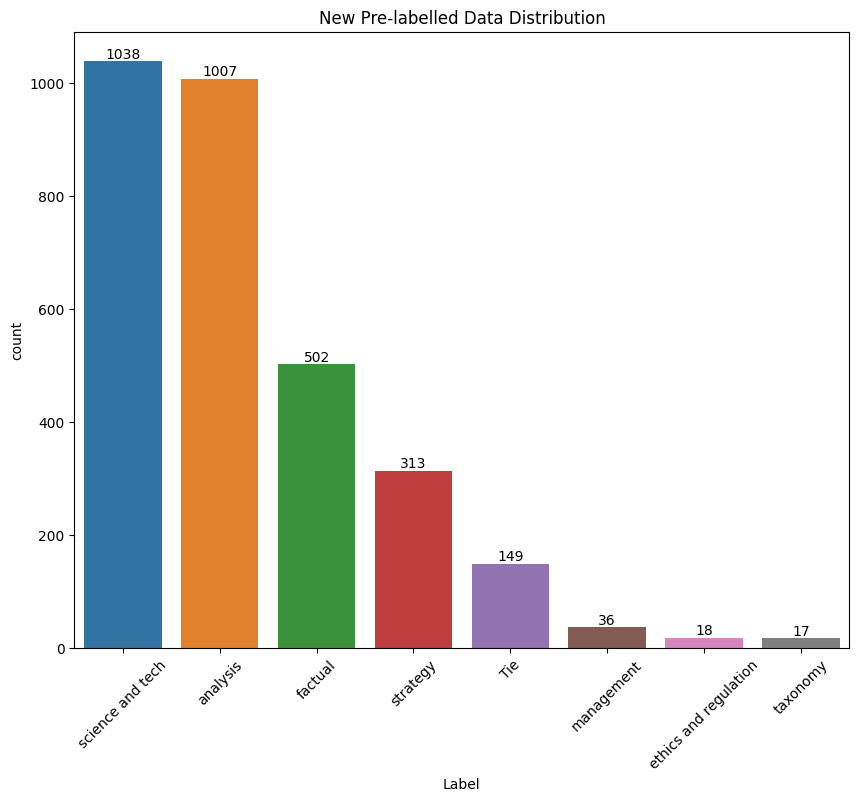

In [114]:
plt.figure(figsize=(10, 8))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('New Pre-labelled Data Distribution')
ax = sns.countplot(data=df_new, x='Label', order=df_new['Label'].value_counts().index)
for i, count in enumerate(df_new['Label'].value_counts()):
   ax.text(i, count, str(count), ha='center', va='bottom') 
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

In [118]:
# Dropping Tie labels
df_new = df_new[df_new['Label'] != 'Tie']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2931 entries, 0 to 3187
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  2931 non-null   object
 1   Answer    2931 non-null   object
 2   Label     2931 non-null   object
dtypes: object(3)
memory usage: 91.6+ KB


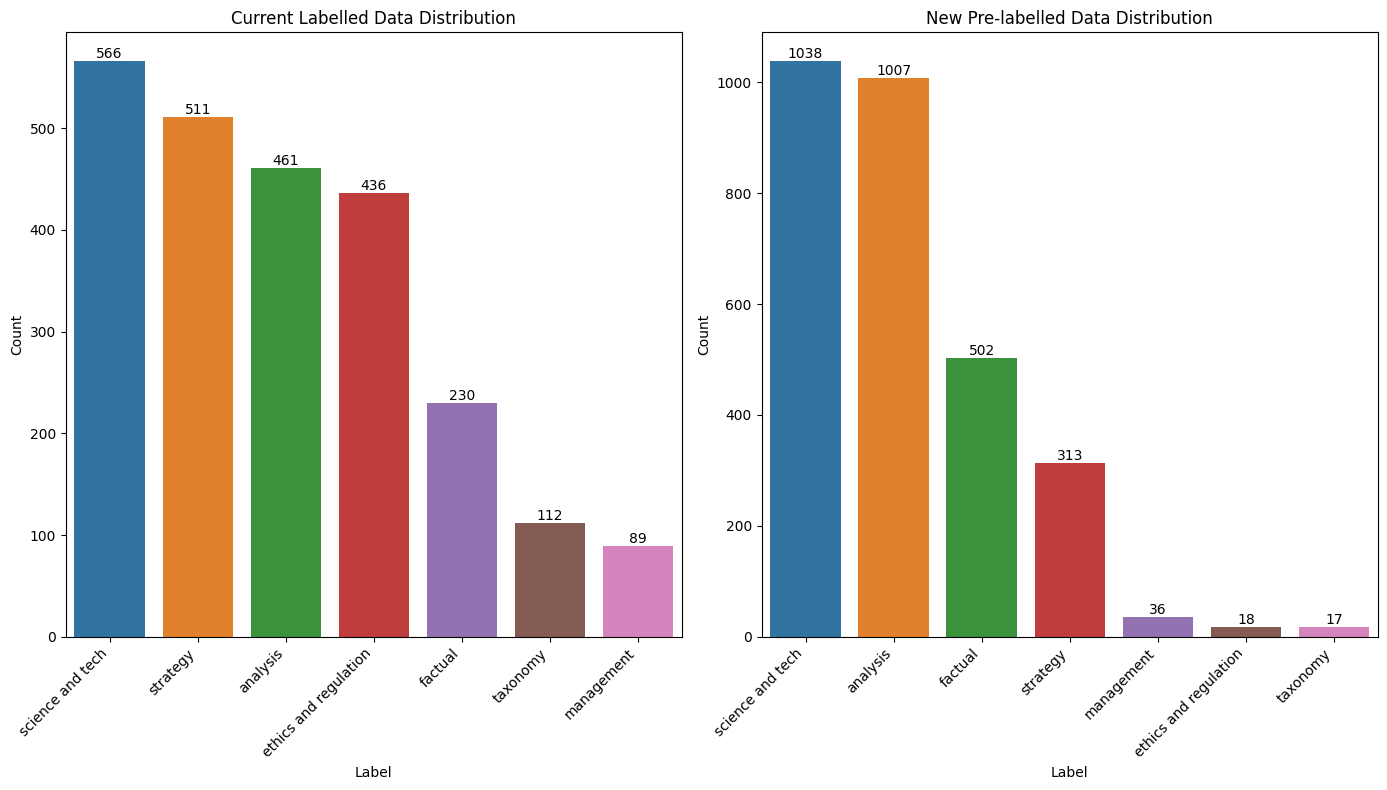

In [119]:
# Plot of old and new label distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index, ax=axes[0])
axes[0].set_title('Current Labelled Data Distribution')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
for i, count in enumerate(df['Label'].value_counts()):
   axes[0].text(i, count, str(count), ha='center', va='bottom') 

sns.countplot(data=df_new, x='Label', order=df_new['Label'].value_counts().index, ax=axes[1])
axes[1].set_title('New Pre-labelled Data Distribution')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
for i, count in enumerate(df_new['Label'].value_counts()):
   axes[1].text(i, count, str(count), ha='center', va='bottom') 

plt.tight_layout()
plt.show()
